In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

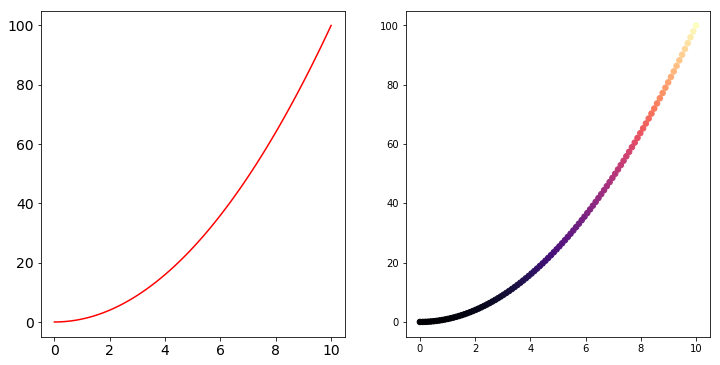

In [58]:
# 具体axes有哪些方法，去 https://matplotlib.org/api/axes_api.html 里查询
fig,ax = plt.subplots(1,2,figsize=(12,6)) #这里注意，ax只有一行或一列时，ax[*,*]不用两个参数，只需ax[*]

ax[0].tick_params(labelsize='14')
# 颜色映射
x_tmp = np.linspace(0,10,100)
y = x_tmp*x_tmp
ax[0].plot(x_tmp,y,c=(1,0,0)) #RGB分量为0-1的小数

ax[1].scatter(x_tmp,y,c=y,cmap=plt.cm.magma,s=30) # s是点的大小, 这里将c设置成y值的列表，并使用cmap来告诉pyplot使用哪个颜色
# cmap样例：https://matplotlib.org/examples/color/colormaps_reference.html

## ramdon_walk

In [59]:
from random import choice
class Randomwalk():
    """生成一个随机漫步数据的类
    """
    
    def __init__(self,num_points=5000):
        """初始化随机漫步的步数
        """
        self.num_points=num_points
        
        # 定义所有随机漫步都从原点开始
        self.x_values=[0]
        self.y_values=[0]
    
    def fill_walk(self):
        """计算随机漫步的点中所有的点，保存在x_value和y_value里
        """
        
        while len(self.x_values) < self.num_points: # 不断漫步直到小于指定步数
            # 定义 x 的前进方向和前进距离
            x_direction = choice([1,-1])
            x_distance = choice([0,1,2,3,4])
            x_step = x_direction*x_distance
            
            y_direction = choice([1,-1])
            y_distance = choice([0,1,2,3,4])
            y_step = y_direction*y_distance
            
            # 拒绝原地踏步
            if x_step == 0 and y_step == 0:
                continue
            
            # 计算下一个点的位置
            next_x = self.x_values[-1]+x_step
            next_y = self.y_values[-1]+y_step
            
            self.x_values.append(next_x)
            self.y_values.append(next_y)

In [60]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

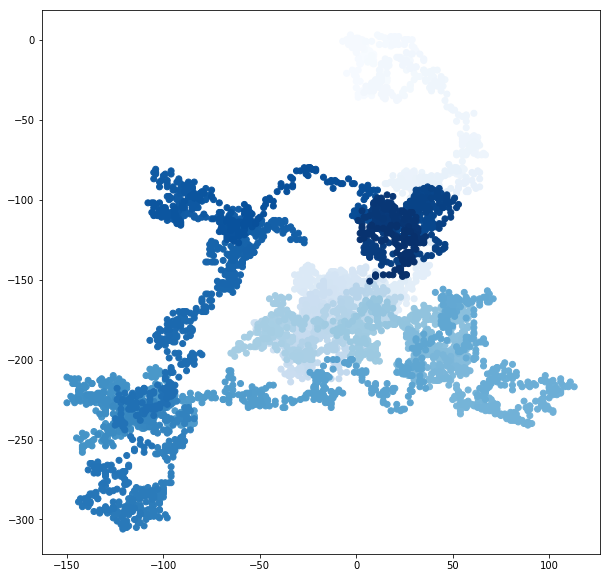

In [74]:
rw = Randomwalk()
rw.fill_walk()
plt.figure(figsize=(10,10))

point_number = np.arange(0,rw.num_points)
plt.scatter(rw.x_values,rw.y_values,c=point_number,cmap=plt.cm.Blues)

### 小结:

1. 直接用plt和面对对象的方法函数是不同的，具体可以查看matplotlib官网的API,如 https://matplotlib.org/api/axes_api.html
2. ax对象：ax只有一行或一列时，ax[\*,\*]不用两个参数，只需ax[\*]
3. 掌握颜色映射： c设置成y值(根据需要选择-变化的值)的`列表`，并使用cmap来告诉pyplot使用哪个颜色
4. random模块里的choice方法